Steam 인디게임 개발자들의 게임판매량 예측 
================
## 한국산업기술대학교 게임공학과 2012180012 김찬현

스팀 데이터 1차 전처리
-----------------------------
 (2017년 6월 28일 작성)

# 1 _서론_
본 주제를 연구하게 된 계기는 보통 인디개발자들이 대기업 게임기업들보다 적은 수의 수익 혹은 고객층을 확보할까라는 단순한 의문에서 비롯하게 된 개인 연구주제이다.
기본적으로 회사는 어떤 상품들, 예를 들어 핸드폰이나 가전제품들을 출시하기전에 홍보를 하는 경우가 많고, 소비자들에게 기대감을 심어주어서 그 제품을 구매하게 유도한다. 이러한 홍보는 보통 tv에 광고를 넣는 형식으로 진행한다.하지만 인디게임개발자들은 돈이 없기에 tv에 광고를 하지는 못하고, 보통 동영상을 이용하고, 대부분 유튜브 혹은 Kickstart등 유명한 무료 플랫폼들에 이러한 동영상을 올려 자신들의 게임을 홍보를 한다. 

이러한 과정이 게임을 출시하는 날 전까지 얼만큼 영향을 주고,얼만큼 오랫동안 동영상으로 홍보를 하면 얼마만큼 수익 혹은 소비자들이 다운로드를 받는지가 궁금했다. 
또한 존속기간이 긴, 오래 동안 게임을 만들어온 회사들이 신생기업 혹은 신생 개발자들보다 무조건 게임을 출시하면 많은 다운로드 수와, 수익을 버는가에 대한 궁금증을 풀기 위해 직접 데이터를 모았다. 

이와 더불어서 각 나라별로도 구분하여, 특정 국적을 가진 개발자나 회사가, 다른 국적을 가진 개발자들과 회사에 비해 유저들이 다운로드 받은 게임 수가 평균 얼마인지를 보고,월등한 수치를 기록한 나라가 있다면, 사회적인 시각으로 접근하여 각 나라별 교육성취도평가가 이에 영향을 줬는지도 후에 따로 파악해볼 예정이다.

# 2. _들어가기 앞서서_


- 필자는 본 연구를 시행하기 앞서서 데이터를 처음 모은 시점이 2017년05월09일이다.프로그래밍 언어는 _파이썬_을 이용하였다.기본적으로 Pandas 를 이용하며 데이터는 하루에 일일히 15개씩 모았다.그리고 조금 더 속도를 높히기 위해 Steam 및 Steamspy 전용 Crawling 코드를 만들어서 하루에 25개~50개씩 데이터를 모았고, 모은 데이터들은 엑셀형식으로 저장했다. 2017년 7월30일날 1000개의 데이터를 모았고, 8월10일까지 데이터 정리와 함께 '인디개발자들의 국적 및 회사들이 설립된 나라'column도 추가하여 ,1000개의 row 와 14개의 column을 만들었다.

 - 기본적으로 selenium을 이용한 웹 크롤링 방식을 사용하여 데이터를 수집하였지만, 동영상 등록 날짜 , 게임을 제작할때 쓰인 엔진 혹은 언어, 회사의 초기설립연도(인디개발자들이 처음 활동을 시작한 연도) ,개발자의 국적(회사가 설립된 나라)등은 모두 직접 검색하고, 개발자들에게 물어가며 작업을 하였다.

- 원래는 머신러닝을 이용한 회귀분석과 자연어 처리를 통한 고객들의 반응 평가에서, 가장 긍정적으로 뽑힌 단어들의 우선순위를 통해 게임의 어떤 요소가 더 중요한지에 대해 알아보고자 했다. 하지만 데이터 1000개는 이를 하기에는 표본으로서 부족한 갯수이며, 실질적으로 데이터를 만 단위까지 모으기에는 졸업작품과 병행하기에 시간이 부족하기 때문에, 좀더 심화된 부분인 ML은 추후에 할 예정이다.

- 게임데이터는 내년 2018년 8월까지 최대한 만 개까지 모을 생각이며, 졸업작품으로 써가 아닌 개인 연구과제로 계속 진행해 나갈 예정이다.

# 3. _정확한 데이터인가_

###  1차 전처리 Columns 소개

- 게임이름
- 데이터 조사날짜
- 스팀 리뷰 수
- 스팀외 리뷰 수
- 스팀발매 일자
- 평점
- 장르
- 사용된 게임엔진
- 개발자 or 게임회사 이름
- 개발자 초기 게임 제작 날짜 or 게임회사 초기 설립날짜
- 개발자 or 게임회사의 존속기간
- 게임의 View방식 (2D,3D)
- 게임 출시 전에 유튜브에 올린 초기 게임 홍보영상(게임 제작과정 업로드 포함)
- Owner Value (유저들이 게임을 다운로드 받은 횟수 및 구매한 횟수 라고 가정하는 값)

-------------------------------------------------
아래는 파이썬 코드부분입니다.

-------------------------------------------------

In [342]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt

In [343]:
df = pd.read_csv('./Steam_Predict_Download_data_Original2017_4.3ver.csv')

In [344]:
df.head()

,게임제목,조사날짜,스팀리뷰수,스팀외리뷰수,스팀발매일,평점,가격,엔진플랫폼,장르,유튜브등록날짜,...,비고,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27
0,Little Nightmares,2017-05-09,1196,331,2017-04-28,9,25800,Unreal,호러,2015-02-25,...,NaN,NaN,https://www-youtube-com/watch?v=5ctdjfUbLDE&li...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Bendy and the Ink machine Chapter one,2017-05-09,29,1307,2017-04-27,9,0,Unity,호러,2016-05-11,...,NaN,NaN,https://www-youtube-com/watch?v=4sipjSYDKxI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,The SEXY BRUTAL,2017-05-09,214,14,2017-04-11,9,21000,Unity,어드벤쳐,2016-08-19,...,NaN,NaN,https://www-youtube-com/watch?v=6gpb_dEqff0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Bendy and the Ink machine Chapter two,2017-05-09,89,7,2017-04-27,9,6500,Unity,호러,2016-05-11,...,NaN,NaN,https://www-youtube-com/watch?v=4sipjSYDKxI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Ori and the Blind Forest,2017-05-09,4734,713,2015-03-11,10,10500,Unity,액션,2014-06-09,...,NaN,NaN,https://www-youtube-com/watch?v=cklw-Yu3moE,NaN,NaN,NaN,NaN,NaN,NaN,NaN


###### '비고' 열부터 끝까지 지우기 (현재 데이터가 다 채워지지않아서 의미가없음) - 6.28일기준

In [345]:
df = df.drop(df.loc[:,'Unnamed: 16':],axis=1) 

In [346]:
df=df.dropna(thresh=3)
print(df.head())
(df.loc[df.회사존속기간.isnull()])

                                    게임제목        조사날짜 스팀리뷰수 스팀외리뷰수       스팀발매일  \
0                      Little Nightmares  2017-05-09  1196    331  2017-04-28   
1  Bendy and the Ink machine Chapter one  2017-05-09    29   1307  2017-04-27   
2                        The SEXY BRUTAL  2017-05-09   214     14  2017-04-11   
3  Bendy and the Ink machine Chapter two  2017-05-09    89      7  2017-04-27   
4               Ori and the Blind Forest  2017-05-09  4734    713  2015-03-11   

   평점     가격   엔진플랫폼    장르     유튜브등록날짜               회사이름 회사초창기설립날짜 회사존속기간  \
0   9  25800  Unreal    호러  2015-02-25    Tarsier Studios     2004년    13년   
1   9      0   Unity    호러  2016-05-11    TheMeatly Games    2017년     4개월   
2   9  21000   Unity  어드벤쳐  2016-08-19      Tequila Works     2009년     8년   
3   9   6500   Unity    호러  2016-05-11    TheMeatly Games    2017년     4개월   
4  10  10500   Unity    액션  2014-06-09  Moon studios Gmbh     2010년     7년   

  개발자국적 및 회사가 설립된국가 VIEW       보유자수  
0     

,게임제목,조사날짜,스팀리뷰수,스팀외리뷰수,스팀발매일,평점,가격,엔진플랫폼,장르,유튜브등록날짜,회사이름,회사초창기설립날짜,회사존속기간,개발자국적 및 회사가 설립된국가,VIEW,보유자수
1000,realMyst: Masterpiece Edition,2017-07-24,419,60,2014-02-05,NaN,"₩19,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1001,Nightmares from the Deep: The Cursed Heart,2017-07-24,437,552,2012-04-19,NaN,"₩10,500",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [347]:
#회사존속기간이 Null값인 부분을 함수를 만들어서 raw_input으로 집어넣자.
df=df.drop(df.index[999:1001])


-------------------------------------------------------------------------------------------
'Engine' 에서 질문중인 부분 (무슨 엔진을 쓰는지 아직 모르는 부분)은 제외하고 표를 그려본다.


In [348]:
EngineCount=df['엔진플랫폼'].value_counts().drop(['질문중-steam','질문중-youtube','질문해야함','질문중 -steam','질문중 -Steam',
                                             '질문해야함-누가 질문해놨음','질문중 -Youtube','데탑으로 다시보기'])
#EngineName=df['엔진플랫폼'].value_counts().drop(['질문중-steam','질문중-youtube','질문해야함','질문중 -steam','질문중 -Steam','질문해야함-누가 질문해놨음','질문중 -Youtube']).tolist()


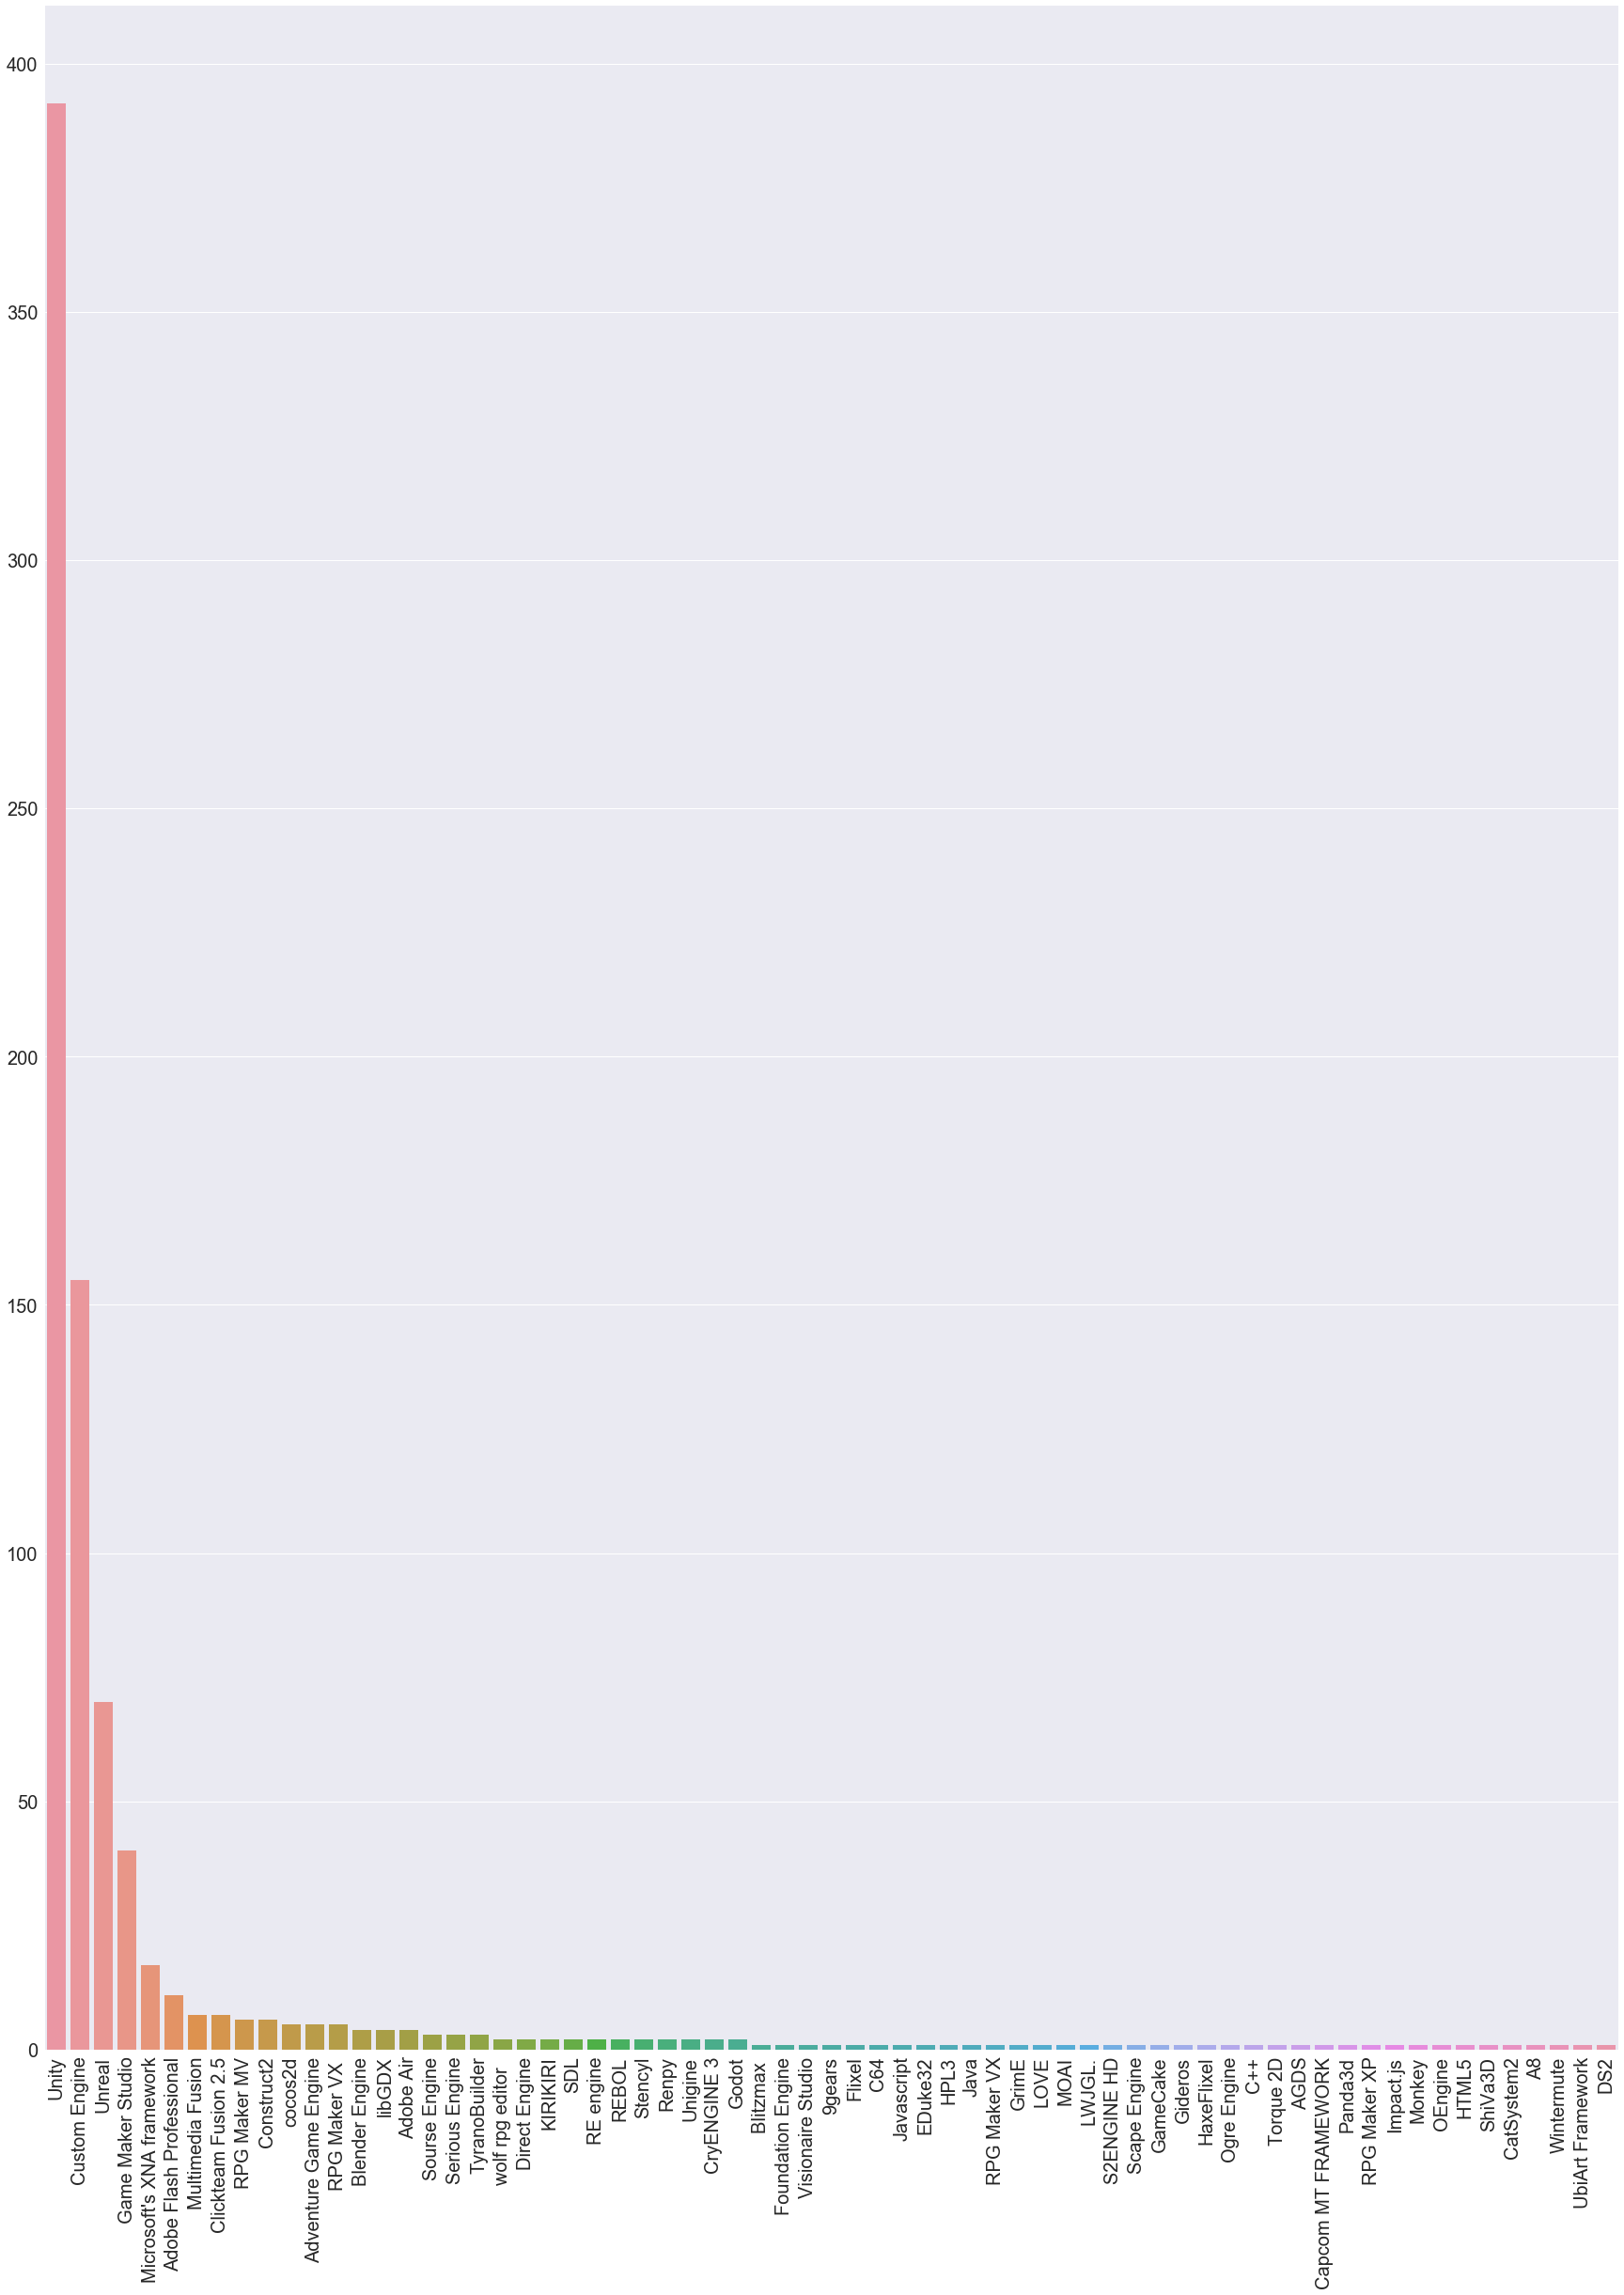

In [349]:
plt.figure(figsize=(30,40))
ax=sns.barplot(EngineCount.index,EngineCount.values)
ax.set_xticklabels(EngineCount.index,rotation=90,fontsize=20)
plt.rc('ytick',labelsize=20)
plt.show()

In [60]:
for EngineName, count in EngineCount.iteritems():
    print(EngineName,count)

Unity 392
Custom Engine 155
Unreal 70
Game Maker Studio 40
Microsoft's XNA framework 17
Adobe Flash Professional 11
Multimedia Fusion 7
Clickteam Fusion 2.5 7
RPG Maker MV 6
Construct2 6
cocos2d 5
Adventure Game Engine 5
RPG Maker VX  5
Blender Engine 4
libGDX 4
Adobe Air 4
Sourse Engine 3
Serious Engine 3
TyranoBuilder 3
wolf rpg editor   2
Direct Engine 2
KIRIKIRI 2
SDL 2
RE engine 2
REBOL 2
Stencyl 2
Renpy 2
Unigine 2
CryENGINE 3 2
Godot 2
Blitzmax  1
Foundation Engine 1
Visionaire Studio 1
9gears 1
Flixel 1
C64 1
Javascript 1
EDuke32 1
HPL3 1
Java 1
RPG Maker VX 1
GrimE 1
LOVE 1
MOAI 1
LWJGL. 1
S2ENGINE HD 1
Scape Engine 1
GameCake 1
Gideros 1
HaxeFlixel 1
Ogre Engine 1
C++ 1
Torque 2D 1
AGDS 1
Capcom MT FRAMEWORK 1
Panda3d 1
RPG Maker XP 1
Impact.js 1
Monkey 1
OEngine 1
HTML5 1
ShiVa3D 1
CatSystem2 1
A8 1
Wintermute 1
UbiArt Framework 1
DS2 1


In [382]:
#df.loc[df['게임제목']=='Spectrubes','유튜브등록날짜']='2016-02-06
df_temp=df[df.보유자수>0]
df_temp.head()

,게임제목,조사날짜,스팀리뷰수,스팀외리뷰수,스팀발매일,평점,가격,엔진플랫폼,장르,유튜브등록날짜,회사이름,회사초창기설립날짜,회사존속기간,개발자국적 및 회사가 설립된국가,VIEW,보유자수,스팀총리뷰수,스팀발매일이전까지의유튜브등록날짜,회사의존속기간
0,Little Nightmares,2017-05-09,1196,331,2017-04-28,9,25800,Unreal,호러,2015-02-25,Tarsier Studios,2004,2017,Sweden,3D,117060.0,1527,793.0,13
1,Bendy and the Ink machine Chapter one,2017-05-09,29,1307,2017-04-27,9,0,Unity,호러,2016-05-11,TheMeatly Games,2017,2017,Canada,3D,337222.0,1336,351.0,0
2,The SEXY BRUTAL,2017-05-09,214,14,2017-04-11,9,21000,Unity,어드벤쳐,2016-08-19,Tequila Works,2009,2017,Spain,3D,13750.0,228,235.0,8
4,Ori and the Blind Forest,2017-05-09,4734,713,2015-03-11,10,10500,Unity,액션,2014-06-09,Moon studios Gmbh,2010,2017,Austria,2D,1226058.0,5447,275.0,7
5,Valiant Hearts: The Great War / Soldats Inconn...,2017-05-09,11234,2431,2014-06-26,10,18500,UbiArt Framework,어드벤쳐,2013-09-10,Ubisoft,1986,2017,France,2D,490572.0,13665,289.0,31


In [387]:
#df_temp['평점']=pd.to_numeric(df_temp['평점'])
#df_temp.groupby(['장르'])['평점'].median()
df_temp.to_csv('./Steam_data_Final_Update.csv')

In [351]:
import re
rc=re.compile("[(,₩]")
rc
df['스팀리뷰수']=pd.to_numeric(df['스팀리뷰수'].str.replace(rc,''))
df['가격']=pd.to_numeric(df['가격'].str.replace(rc,''))
df['스팀외리뷰수']=pd.to_numeric(df['스팀외리뷰수'].str.replace(rc,''))

In [352]:
df['스팀총리뷰수']=pd.to_numeric(df['스팀리뷰수'],errors='ignore')+pd.to_numeric(df['스팀외리뷰수'],errors='ignore')
df['스팀총리뷰수'].head()

0    1527
1    1336
2     228
3      96
4    5447
Name: 스팀총리뷰수, dtype: int64

In [353]:
import datetime
from dateutil.parser import parse as parse_date

In [354]:
dataTime_list=[]
#datalist.append(parse_date(df['조사날짜'][0]))


In [355]:
#EngineName=df['엔진플랫폼'].value_counts().index.tolist()
length = len(df['조사날짜'].value_counts().index.tolist())
df['조사날짜'].value_counts().index.tolist()

['2017-07-16',
 '2017-07-19',
 '2017-07-17',
 '2017-07-07',
 '2017-06-14',
 '2017-07-14',
 '2017-07-09',
 '2017-07-10',
 '2017-06-17',
 '2017-07-11',
 '2017-07-13',
 '2017-07-22',
 '2017-07-18',
 '2017-07-21',
 '2017-07-15',
 '2017-07-24',
 '2017-07-12',
 '2017-07-08',
 '2017-06-18',
 '2017-06-07',
 '2017-07-20',
 '2017-07-25',
 '2017-07-26',
 '2017-06-26',
 '2017-06-20',
 '2017-06-16',
 '2017-06-19',
 '2017-06-11',
 '2017-06-30',
 '2017-07-03',
 '2017-06-28',
 '2017-06-13',
 '2017-07-02',
 '2017-07-05',
 '2017-06-15',
 '2017-07-01',
 '2017-06-29',
 '2017-07-23',
 '2017-07-04',
 '2017-06-22',
 '2017-06-25',
 '2017-06-23',
 '2017-06-10',
 '2017-05-09',
 '2017-06-08',
 '2017-07-31',
 '2017-05-13',
 '2017-05-31',
 '2017-05-14',
 '2017-06-05',
 '2017-05-30',
 '2017-05-25',
 '2017-05-28',
 '2017-05-10',
 '2017-05-29',
 '2017-06-03',
 '2017-06-09',
 '2017-05-22',
 '2017-06-04',
 '2017-05-27',
 '2017-06-06',
 '2017-05-24',
 '2017-06-24',
 '2017-05-20',
 '2017-06-01',
 '2017-06-21']

In [356]:
for i,v in enumerate(df['조사날짜'].value_counts().index.tolist()):
    dataTime_list.append(parse_date(v))

In [357]:
dataTime_list.sort()

In [358]:
dataTime_list

[datetime.datetime(2017, 5, 9, 0, 0),
 datetime.datetime(2017, 5, 10, 0, 0),
 datetime.datetime(2017, 5, 13, 0, 0),
 datetime.datetime(2017, 5, 14, 0, 0),
 datetime.datetime(2017, 5, 20, 0, 0),
 datetime.datetime(2017, 5, 22, 0, 0),
 datetime.datetime(2017, 5, 24, 0, 0),
 datetime.datetime(2017, 5, 25, 0, 0),
 datetime.datetime(2017, 5, 27, 0, 0),
 datetime.datetime(2017, 5, 28, 0, 0),
 datetime.datetime(2017, 5, 29, 0, 0),
 datetime.datetime(2017, 5, 30, 0, 0),
 datetime.datetime(2017, 5, 31, 0, 0),
 datetime.datetime(2017, 6, 1, 0, 0),
 datetime.datetime(2017, 6, 3, 0, 0),
 datetime.datetime(2017, 6, 4, 0, 0),
 datetime.datetime(2017, 6, 5, 0, 0),
 datetime.datetime(2017, 6, 6, 0, 0),
 datetime.datetime(2017, 6, 7, 0, 0),
 datetime.datetime(2017, 6, 8, 0, 0),
 datetime.datetime(2017, 6, 9, 0, 0),
 datetime.datetime(2017, 6, 10, 0, 0),
 datetime.datetime(2017, 6, 11, 0, 0),
 datetime.datetime(2017, 6, 13, 0, 0),
 datetime.datetime(2017, 6, 14, 0, 0),
 datetime.datetime(2017, 6, 15, 0,

In [359]:
df.groupby('조사날짜')['유튜브등록날짜'].describe()

,count,unique,top,freq
조사날짜,,,,
2017-05-09,11,10,2016-05-11,2
2017-05-10,5,5,2015-09-22,1
2017-05-13,6,6,2017-04-26,1
2017-05-14,5,5,2010-05-10,1
2017-05-20,2,2,2015-10-28,1
2017-05-22,4,4,2017-01-08,1
2017-05-24,3,3,2017-02-17,1
2017-05-25,5,5,2015-06-16,1
2017-05-27,3,3,2014-06-25,1


In [360]:
df['조사날짜'].value_counts().index

Index(['2017-07-16', '2017-07-19', '2017-07-17', '2017-07-07', '2017-06-14',
       '2017-07-14', '2017-07-09', '2017-07-10', '2017-06-17', '2017-07-11',
       '2017-07-13', '2017-07-22', '2017-07-18', '2017-07-21', '2017-07-15',
       '2017-07-24', '2017-07-12', '2017-07-08', '2017-06-18', '2017-06-07',
       '2017-07-20', '2017-07-25', '2017-07-26', '2017-06-26', '2017-06-20',
       '2017-06-16', '2017-06-19', '2017-06-11', '2017-06-30', '2017-07-03',
       '2017-06-28', '2017-06-13', '2017-07-02', '2017-07-05', '2017-06-15',
       '2017-07-01', '2017-06-29', '2017-07-23', '2017-07-04', '2017-06-22',
       '2017-06-25', '2017-06-23', '2017-06-10', '2017-05-09', '2017-06-08',
       '2017-07-31', '2017-05-13', '2017-05-31', '2017-05-14', '2017-06-05',
       '2017-05-30', '2017-05-25', '2017-05-28', '2017-05-10', '2017-05-29',
       '2017-06-03', '2017-06-09', '2017-05-22', '2017-06-04', '2017-05-27',
       '2017-06-06', '2017-05-24', '2017-06-24', '2017-05-20', '2017-06-01',

In [361]:
between_Pubdate_UtubeRegister=[]
for index,row in df.iterrows():
    #if (parse_date(row['조사날짜']) - parse_date(row['유튜브등록날짜'])<0):
        #print(parse['조사날짜'])
    
    between_Pubdate_UtubeRegister.append((parse_date(row['스팀발매일']) - parse_date(row['유튜브등록날짜'])))

In [362]:
df['스팀발매일이전까지의유튜브등록날짜']=between_Pubdate_UtubeRegister

In [363]:
df.head()

,게임제목,조사날짜,스팀리뷰수,스팀외리뷰수,스팀발매일,평점,가격,엔진플랫폼,장르,유튜브등록날짜,회사이름,회사초창기설립날짜,회사존속기간,개발자국적 및 회사가 설립된국가,VIEW,보유자수,스팀총리뷰수,스팀발매일이전까지의유튜브등록날짜
0,Little Nightmares,2017-05-09,1196,331,2017-04-28,9,25800,Unreal,호러,2015-02-25,Tarsier Studios,2004년,13년,Sweden,3D,117060.0,1527,793 days
1,Bendy and the Ink machine Chapter one,2017-05-09,29,1307,2017-04-27,9,0,Unity,호러,2016-05-11,TheMeatly Games,2017년,4개월,Canada,3D,337222.0,1336,351 days
2,The SEXY BRUTAL,2017-05-09,214,14,2017-04-11,9,21000,Unity,어드벤쳐,2016-08-19,Tequila Works,2009년,8년,Spain,3D,13750.0,228,235 days
3,Bendy and the Ink machine Chapter two,2017-05-09,89,7,2017-04-27,9,6500,Unity,호러,2016-05-11,TheMeatly Games,2017년,4개월,Canada,3D,NaN,96,351 days
4,Ori and the Blind Forest,2017-05-09,4734,713,2015-03-11,10,10500,Unity,액션,2014-06-09,Moon studios Gmbh,2010년,7년,Austria,2D,1226058.0,5447,275 days


In [264]:
df.groupby('스팀총리뷰수')['스팀발매일이전까지의유튜브등록날짜'].max()

스팀총리뷰수
1         603 days
2        1083 days
3         488 days
4         977 days
5         561 days
6         687 days
7         388 days
8        1310 days
9         601 days
10      11639 days
11       1478 days
12       1080 days
13        779 days
14        785 days
15       1536 days
16       1787 days
17        858 days
18       1340 days
19        674 days
20        459 days
21       1397 days
22        767 days
23        888 days
24       2711 days
25        630 days
26        882 days
27        592 days
28        954 days
29       1488 days
30        566 days
           ...    
4976      625 days
5019       10 days
5246       97 days
5447      275 days
5778       27 days
5779      164 days
5934        2 days
6121     1802 days
6264      679 days
6435      196 days
6489       66 days
6740       25 days
6938      597 days
6963       30 days
7529      364 days
7966      335 days
8805      293 days
9161      100 days
10267     721 days
11725     885 days
11826      93 days
12609

In [262]:
df.loc[df['스팀총리뷰수']==14263]

,게임제목,조사날짜,스팀리뷰수,스팀외리뷰수,스팀발매일,평점,가격,엔진플랫폼,장르,유튜브등록날짜,회사이름,회사초창기설립날짜,회사존속기간,개발자국적 및 회사가 설립된국가,VIEW,보유자수,스팀총리뷰수,스팀발매일이전까지의유튜브등록날짜
425,Trine 2,2017-07-01,9210,5053,2013-06-07,10.0,21000,Custom Engine,액션,2015-03-02,Frozenbyte,2001년,16년,NaN,3D,2769279.0,14263,-633 days


In [410]:
df_temp['매출액']=df_temp['보유자수']*df_temp['가격']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


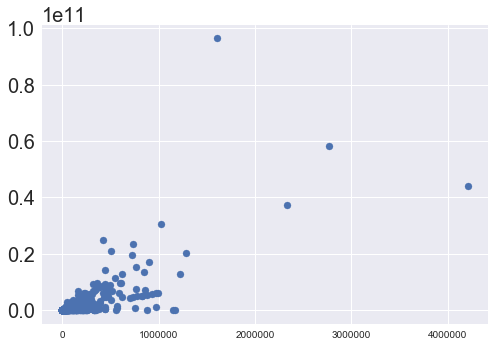

In [319]:
plt.scatter(df_temp['보유자수'],df_temp['매출액'])
plt.show()

In [115]:
df[df['스팀총리뷰수']>10000]

,게임제목,조사날짜,스팀리뷰수,스팀외리뷰수,스팀발매일,평점,가격,엔진플랫폼,장르,유튜브등록날짜,회사이름,회사초창기설립날짜,회사존속기간,개발자국적 및 회사가 설립된국가,VIEW,보유자수,스팀총리뷰수,스팀발매일이전까지의유튜브등록날짜,매출액
5,Valiant Hearts: The Great War / Soldats Inconn...,2017-05-09,11234,2431,2014-06-26,10.0,18500,UbiArt Framework,어드벤쳐,2013-09-10,Ubisoft,1986년,31년,France,2D,490572.0,13665,289 days,9.075582e+09
26,Limbo,2017-05-14,8969,14892,2011-08-03,10.0,10500,Custom Engine,어드벤쳐,2010-05-10,Playdead,2006년,11년,Denmark,2D,4212109.0,23861,450 days,4.422714e+10
57,RESIDENT EVIL 7 biohazard,2017-05-28,7074,5748,2017-01-24,9.0,59000,RE engine,액션,2016-06-13,CAPCOM,1979년,38년,Japan,3D,420783.0,12822,225 days,2.482620e+10
312,INSIDE,2017-06-22,10537,2227,2016-07-08,10.0,21000,Unity,어드벤쳐,2014-06-09,Playdead,2006년,11년,NaN,3D,617670.0,12764,760 days,1.297107e+10
419,HuniePop,2017-07-01,10035,2574,2015-01-20,10.0,10500,Unity,시뮬레이션,2014-05-17,HuniePot,2014년,3년,NaN,2D,588889.0,12609,248 days,6.183334e+09
425,Trine 2,2017-07-01,9210,5053,2013-06-07,10.0,21000,Custom Engine,액션,2015-03-02,Frozenbyte,2001년,16년,NaN,3D,2769279.0,14263,-633 days,5.815486e+10
473,Rise of the Tomb Raider™,2017-07-04,18667,10487,2016-02-10,9.0,59900,Custom Engine,어드벤쳐,2015-10-23,Crystal Dynamics,1992년,25년,NaN,3D,1609942.0,29154,110 days,9.643553e+10
481,SUPERHOT,2017-07-05,6738,4987,2016-02-15,9.0,27000,Unity,액션,2013-09-13,SUPERHOT Team,2013년,4년,NaN,3D,725985.0,11725,885 days,1.960160e+10
603,SOMA,2017-07-11,8601,1666,2015-09-22,10.0,32000,HPL3,호러,2013-10-01,Frictional Games,2006년,11년,NaN,3D,446520.0,10267,721 days,1.428864e+10
774,The Escapists,2017-07-17,10581,1245,2015-02-14,9.0,19000,Multimedia Fusion,전략,2014-11-13,Mouldy Toof Studios,2014년,3년,NaN,2D,896698.0,11826,93 days,1.703726e+10


In [321]:
df_temp[df_temp['매출액']>10000000].count()

게임제목                 828
조사날짜                 828
스팀리뷰수                828
스팀외리뷰수               828
스팀발매일                828
평점                   728
가격                   828
엔진플랫폼                828
장르                   828
유튜브등록날짜              828
회사이름                 828
회사초창기설립날짜            828
회사존속기간               828
개발자국적 및 회사가 설립된국가    108
VIEW                 828
보유자수                 828
스팀총리뷰수               828
스팀발매일이전까지의유튜브등록날짜    828
매출액                  828
dtype: int64

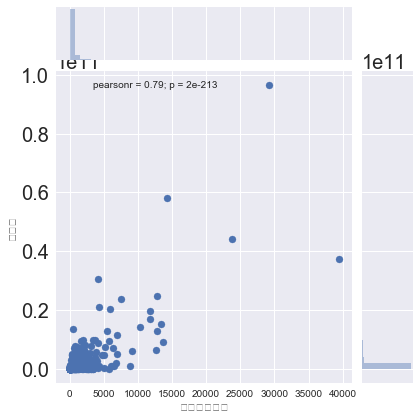

In [322]:
plt.figure(figsize=(10,10))
sns.jointplot(x=u'스팀총리뷰수',y=u'매출액',data=df_temp)
plt.show()

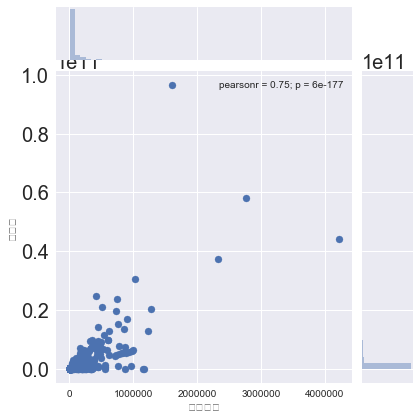

In [323]:
plt.figure(figsize=(10,10))
sns.jointplot(x=u'보유자수',y=u'매출액',data=df_temp)
plt.show()

In [364]:
dateCount=pd.to_numeric(df['스팀발매일이전까지의유튜브등록날짜'])
dateCount

0       68515200000000000
1       30326400000000000
2       20304000000000000
3       30326400000000000
4       23760000000000000
5       24969600000000000
6       87696000000000000
7       15465600000000000
8       10972800000000000
9        6393600000000000
10       6393600000000000
11       6480000000000000
12       6912000000000000
13      14774400000000000
14      49766400000000000
15        777600000000000
16      30326400000000000
17      24883200000000000
18       5011200000000000
19       1468800000000000
20       9072000000000000
21      85449600000000000
22      97027200000000000
23       2246400000000000
24        172800000000000
25      90633600000000000
26      38880000000000000
27       3110400000000000
28      14947200000000000
29      43200000000000000
              ...        
970     12355200000000000
971     92880000000000000
972     37324800000000000
973     94176000000000000
974     41299200000000000
975     91584000000000000
976     46569600000000000
977     2574

In [365]:
dateCount=dateCount/60/60/24/100000000000*10**2

In [366]:
df['스팀발매일이전까지의유튜브등록날짜']=dateCount

In [367]:
df.head()

,게임제목,조사날짜,스팀리뷰수,스팀외리뷰수,스팀발매일,평점,가격,엔진플랫폼,장르,유튜브등록날짜,회사이름,회사초창기설립날짜,회사존속기간,개발자국적 및 회사가 설립된국가,VIEW,보유자수,스팀총리뷰수,스팀발매일이전까지의유튜브등록날짜
0,Little Nightmares,2017-05-09,1196,331,2017-04-28,9,25800,Unreal,호러,2015-02-25,Tarsier Studios,2004년,13년,Sweden,3D,117060.0,1527,793.0
1,Bendy and the Ink machine Chapter one,2017-05-09,29,1307,2017-04-27,9,0,Unity,호러,2016-05-11,TheMeatly Games,2017년,4개월,Canada,3D,337222.0,1336,351.0
2,The SEXY BRUTAL,2017-05-09,214,14,2017-04-11,9,21000,Unity,어드벤쳐,2016-08-19,Tequila Works,2009년,8년,Spain,3D,13750.0,228,235.0
3,Bendy and the Ink machine Chapter two,2017-05-09,89,7,2017-04-27,9,6500,Unity,호러,2016-05-11,TheMeatly Games,2017년,4개월,Canada,3D,NaN,96,351.0
4,Ori and the Blind Forest,2017-05-09,4734,713,2015-03-11,10,10500,Unity,액션,2014-06-09,Moon studios Gmbh,2010년,7년,Austria,2D,1226058.0,5447,275.0


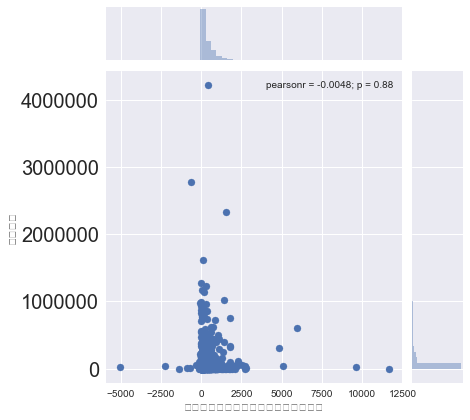

In [331]:
plt.figure(figsize=(10,10))
sns.jointplot(x=dateCount, y=df_temp['보유자수'])
plt.show()
#kde plot

In [280]:
df.head()

,게임제목,조사날짜,스팀리뷰수,스팀외리뷰수,스팀발매일,평점,가격,엔진플랫폼,장르,유튜브등록날짜,회사이름,회사초창기설립날짜,회사존속기간,개발자국적 및 회사가 설립된국가,VIEW,보유자수,스팀총리뷰수,스팀발매일이전까지의유튜브등록날짜,매출액
0,Little Nightmares,2017-05-09,1196,331,2017-04-28,9.0,25800,Unreal,호러,2015-02-25,Tarsier Studios,2004년,13년,Sweden,3D,117060.0,1527,793.0,3.020148e+09
1,Bendy and the Ink machine Chapter one,2017-05-09,29,1307,2017-04-27,9.0,0,Unity,호러,2016-05-11,TheMeatly Games,2017년,4개월,Canada,3D,337222.0,1336,351.0,0.000000e+00
2,The SEXY BRUTAL,2017-05-09,214,14,2017-04-11,9.0,21000,Unity,어드벤쳐,2016-08-19,Tequila Works,2009년,8년,Spain,3D,13750.0,228,235.0,2.887500e+08
3,Bendy and the Ink machine Chapter two,2017-05-09,89,7,2017-04-27,9.0,6500,Unity,호러,2016-05-11,TheMeatly Games,2017년,4개월,Canada,3D,NaN,96,351.0,NaN
4,Ori and the Blind Forest,2017-05-09,4734,713,2015-03-11,10.0,10500,Unity,액션,2014-06-09,Moon studios Gmbh,2010년,7년,Austria,2D,1226058.0,5447,275.0,1.287361e+10


In [368]:
import re
df['회사존속기간']='2017년'

In [369]:
df.head()

,게임제목,조사날짜,스팀리뷰수,스팀외리뷰수,스팀발매일,평점,가격,엔진플랫폼,장르,유튜브등록날짜,회사이름,회사초창기설립날짜,회사존속기간,개발자국적 및 회사가 설립된국가,VIEW,보유자수,스팀총리뷰수,스팀발매일이전까지의유튜브등록날짜
0,Little Nightmares,2017-05-09,1196,331,2017-04-28,9,25800,Unreal,호러,2015-02-25,Tarsier Studios,2004년,2017년,Sweden,3D,117060.0,1527,793.0
1,Bendy and the Ink machine Chapter one,2017-05-09,29,1307,2017-04-27,9,0,Unity,호러,2016-05-11,TheMeatly Games,2017년,2017년,Canada,3D,337222.0,1336,351.0
2,The SEXY BRUTAL,2017-05-09,214,14,2017-04-11,9,21000,Unity,어드벤쳐,2016-08-19,Tequila Works,2009년,2017년,Spain,3D,13750.0,228,235.0
3,Bendy and the Ink machine Chapter two,2017-05-09,89,7,2017-04-27,9,6500,Unity,호러,2016-05-11,TheMeatly Games,2017년,2017년,Canada,3D,NaN,96,351.0
4,Ori and the Blind Forest,2017-05-09,4734,713,2015-03-11,10,10500,Unity,액션,2014-06-09,Moon studios Gmbh,2010년,2017년,Austria,2D,1226058.0,5447,275.0


In [370]:
FoundedDateYear=[]
regex= re.compile('[0-9]{4}')
for index,row in df.iterrows():
    
    a=regex.search(row['회사초창기설립날짜'])
    FoundedDateYear.append(a.group(0))

In [371]:
type(FoundedDateYear[0])
#FoundedDateYear[1]

str

In [372]:
FoundedDateYear= pd.to_numeric(FoundedDateYear)

In [373]:
FoundedDateYear

array([2004, 2017, 2009, 2017, 2010, 1986, 2016, 2017, 2016, 2014, 2003,
       2015, 2015, 2001, 1984, 2012, 2017, 2013, 2017, 2016, 2017, 2014,
       2012, 2016, 2006, 2011, 2006, 2014, 1989, 2009, 2014, 2012, 2014,
       2015, 2016, 2015, 2016, 2016, 2016, 2017, 2016, 2016, 2011, 2017,
       2009, 2016, 2016, 2012, 2012, 2009, 2016, 2015, 2010, 2013, 2008,
       2015, 2015, 1979, 2015, 1992, 2015, 2015, 2013, 2013, 2014, 2015,
       2013, 2010, 2016, 2016, 2016, 2013, 2016, 2015, 2014, 2016, 2014,
       2007, 2012, 2014, 2015, 1979, 2008, 2015, 2011, 2016, 2012, 2014,
       2012, 2015, 2015, 2015, 2016, 2015, 2016, 2008, 2015, 2016, 2016,
       2015, 2016, 2008, 2009, 2002, 2016, 2016, 2014, 2010, 2016, 2015,
       2012, 2013, 2016, 2008, 2014, 2015, 2011, 2016, 2015, 2015, 2015,
       2016, 2015, 2015, 2013, 2007, 2014, 2015, 2016, 2011, 2008, 2015,
       2016, 2016, 2013, 2014, 2016, 2016, 2009, 2009, 2014, 1994, 2011,
       2015, 2014, 2015, 2016, 2016, 2016, 2015, 20

In [374]:
df['회사초창기설립날짜']=FoundedDateYear

In [341]:
df.tail()

,게임제목,조사날짜,스팀리뷰수,스팀외리뷰수,스팀발매일,평점,가격,엔진플랫폼,장르,유튜브등록날짜,회사이름,회사초창기설립날짜,회사존속기간,개발자국적 및 회사가 설립된국가,VIEW,보유자수,스팀총리뷰수
995,Card City Nights,2017-07-25,499,265,2014-02-15,9.0,4400,Unity,캐쥬얼,2014-01-29,Ludosity,2009년,2017년,NaN,2D,117316.0,764
996,Girls Like Robots,2017-07-25,41,142,2014-02-15,8.0,7500,Unity,캐쥬얼,2012-02-12,Popcannibal,2010년,2017년,NaN,2D,121966.0,183
997,NaissanceE,2017-07-25,614,299,2014-02-14,9.0,16000,Unreal,어드벤쳐,2012-12-19,Limasse Five,2012년,2017년,NaN,3D,61877.0,913
998,OMG Zombies!,2017-07-24,261,59,2014-02-14,9.0,5500,질문중-youtube,액션,2013-03-14,Laughing Jackal LTD,2005년,2017년,NaN,2D,30581.0,320
999,Ethan: Meteor Hunter,2017-07-24,50,151,2014-02-08,6.0,10500,Custom Engine,액션,2013-05-12,Seaven Studio,2013년,2017년,NaN,3D,39344.0,201


In [375]:
TheseYear=[]
for index,row in df.iterrows():
    TheseYear.append(re.sub('[^0-9]', '', row['회사존속기간']))

In [376]:
df['회사존속기간']=pd.to_numeric(TheseYear)

In [377]:
df.tail()

,게임제목,조사날짜,스팀리뷰수,스팀외리뷰수,스팀발매일,평점,가격,엔진플랫폼,장르,유튜브등록날짜,회사이름,회사초창기설립날짜,회사존속기간,개발자국적 및 회사가 설립된국가,VIEW,보유자수,스팀총리뷰수,스팀발매일이전까지의유튜브등록날짜
995,Card City Nights,2017-07-25,499,265,2014-02-15,9,4400,Unity,캐쥬얼,2014-01-29,Ludosity,2009,2017,NaN,2D,117316.0,764,17.0
996,Girls Like Robots,2017-07-25,41,142,2014-02-15,8,7500,Unity,캐쥬얼,2012-02-12,Popcannibal,2010,2017,NaN,2D,121966.0,183,734.0
997,NaissanceE,2017-07-25,614,299,2014-02-14,9,16000,Unreal,어드벤쳐,2012-12-19,Limasse Five,2012,2017,NaN,3D,61877.0,913,422.0
998,OMG Zombies!,2017-07-24,261,59,2014-02-14,9,5500,질문중-youtube,액션,2013-03-14,Laughing Jackal LTD,2005,2017,NaN,2D,30581.0,320,337.0
999,Ethan: Meteor Hunter,2017-07-24,50,151,2014-02-08,6,10500,Custom Engine,액션,2013-05-12,Seaven Studio,2013,2017,NaN,3D,39344.0,201,272.0


In [378]:
df['회사의존속기간']=df['회사존속기간']-df['회사초창기설립날짜']

In [379]:
df.tail()

,게임제목,조사날짜,스팀리뷰수,스팀외리뷰수,스팀발매일,평점,가격,엔진플랫폼,장르,유튜브등록날짜,회사이름,회사초창기설립날짜,회사존속기간,개발자국적 및 회사가 설립된국가,VIEW,보유자수,스팀총리뷰수,스팀발매일이전까지의유튜브등록날짜,회사의존속기간
995,Card City Nights,2017-07-25,499,265,2014-02-15,9,4400,Unity,캐쥬얼,2014-01-29,Ludosity,2009,2017,NaN,2D,117316.0,764,17.0,8
996,Girls Like Robots,2017-07-25,41,142,2014-02-15,8,7500,Unity,캐쥬얼,2012-02-12,Popcannibal,2010,2017,NaN,2D,121966.0,183,734.0,7
997,NaissanceE,2017-07-25,614,299,2014-02-14,9,16000,Unreal,어드벤쳐,2012-12-19,Limasse Five,2012,2017,NaN,3D,61877.0,913,422.0,5
998,OMG Zombies!,2017-07-24,261,59,2014-02-14,9,5500,질문중-youtube,액션,2013-03-14,Laughing Jackal LTD,2005,2017,NaN,2D,30581.0,320,337.0,12
999,Ethan: Meteor Hunter,2017-07-24,50,151,2014-02-08,6,10500,Custom Engine,액션,2013-05-12,Seaven Studio,2013,2017,NaN,3D,39344.0,201,272.0,4


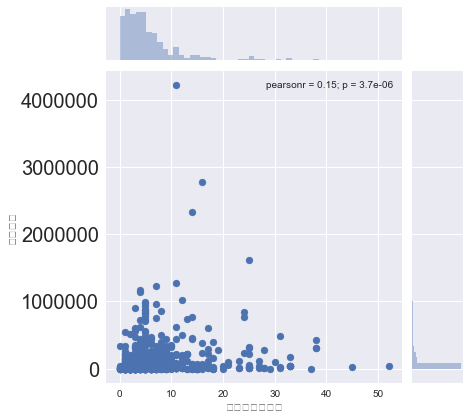

In [136]:
plt.figure(figsize=(10,10))
sns.jointplot(x=df['회사의존속기간'], y=df['보유자수'])
plt.show()

In [381]:
#df.groupby('엔진플랫폼')['스팀총리뷰수','게임제목'].max()
df.to_csv('./Steam_data_Fix_Inform.csv')

In [138]:
def peak(x):
    return x.max()

peak(df[df.엔진플랫폼=='Unity'])

게임제목                       the Sequence
조사날짜                         2017-07-31
스팀리뷰수                             10537
스팀외리뷰수                             5725
스팀발매일                        2017-07-12
평점                                   10
가격                                43000
엔진플랫폼                             Unity
장르                                   호러
유튜브등록날짜                      2017-06-23
회사이름                    Почежерцев Влад
회사초창기설립날짜                          2017
회사존속기간                             2017
VIEW                                 3D
보유자수                        1.22606e+06
스팀총리뷰수                            12764
스팀발매일이전까지의유튜브등록날짜    9643 days 00:00:00
매출액                         1.96016e+10
회사의존속기간                              33
dtype: object

In [313]:
df.groupby(df['엔진플랫폼']=='Unity')['스팀총리뷰수','게임제목'].max()

,스팀총리뷰수,게임제목
엔진플랫폼,,
False,29154,prog.1
True,12764,the Sequence


In [139]:
df.groupby('엔진플랫폼')['스팀총리뷰수','게임제목'].max()

,스팀총리뷰수,게임제목
엔진플랫폼,,
9gears,65,Vitrum
A8,45,Starlaxis Supernova Edition
AGDS,22,Black Rainbow
Adobe Air,1032,The Floor is Jelly
Adobe Flash Professional,2825,Wheely
Adventure Game Engine,564,Vive le Roi
Blender Engine,77,Tomato Jones
Blitzmax,53,Spooky Bonus
C++,63,Recursed


In [140]:
df.tail()

,게임제목,조사날짜,스팀리뷰수,스팀외리뷰수,스팀발매일,평점,가격,엔진플랫폼,장르,유튜브등록날짜,회사이름,회사초창기설립날짜,회사존속기간,개발자국적 및 회사가 설립된국가,VIEW,보유자수,스팀총리뷰수,스팀발매일이전까지의유튜브등록날짜,매출액,회사의존속기간
995,Card City Nights,2017-07-25,499,265,2014-02-15,9.0,4400,Unity,캐쥬얼,2014-01-29,Ludosity,2009,2017,NaN,2D,117316.0,764,17 days,516190400.0,8
996,Girls Like Robots,2017-07-25,41,142,2014-02-15,8.0,7500,Unity,캐쥬얼,2012-02-12,Popcannibal,2010,2017,NaN,2D,121966.0,183,734 days,914745000.0,7
997,NaissanceE,2017-07-25,614,299,2014-02-14,9.0,16000,Unreal,어드벤쳐,2012-12-19,Limasse Five,2012,2017,NaN,3D,61877.0,913,422 days,990032000.0,5
998,OMG Zombies!,2017-07-24,261,59,2014-02-14,9.0,5500,질문중-youtube,액션,2013-03-14,Laughing Jackal LTD,2005,2017,NaN,2D,30581.0,320,337 days,168195500.0,12
999,Ethan: Meteor Hunter,2017-07-24,50,151,2014-02-08,6.0,10500,Custom Engine,액션,2013-05-12,Seaven Studio,2013,2017,NaN,3D,39344.0,201,272 days,413112000.0,4


In [56]:
bins=[0,4600,9200,13800,18400,24000]
labels=['정말많이팔림','많이팔림','보통','안팔림','정말안팔림']
labels.reverse()
print(labels)
pd.cut(df.총다운로드수,bins,labels=labels)


['정말안팔림', '안팔림', '보통', '많이팔림', '정말많이팔림']


0       정말안팔림
1       정말안팔림
2       정말안팔림
3       정말안팔림
4         안팔림
5          보통
6       정말안팔림
7       정말안팔림
8       정말안팔림
9       정말안팔림
10      정말안팔림
11      정말안팔림
12      정말안팔림
13      정말안팔림
14      정말안팔림
15      정말안팔림
16      정말안팔림
17      정말안팔림
18      정말안팔림
19      정말안팔림
20      정말안팔림
21      정말안팔림
22      정말안팔림
23      정말안팔림
24        안팔림
25      정말안팔림
26     정말많이팔림
27      정말안팔림
28      정말안팔림
29      정말안팔림
        ...  
174     정말안팔림
175     정말안팔림
176     정말안팔림
177     정말안팔림
178     정말안팔림
179     정말안팔림
180     정말안팔림
181     정말안팔림
182     정말안팔림
183     정말안팔림
184     정말안팔림
185     정말안팔림
186     정말안팔림
187     정말안팔림
188     정말안팔림
189     정말안팔림
190     정말안팔림
191     정말안팔림
192     정말안팔림
193     정말안팔림
194     정말안팔림
195     정말안팔림
196     정말안팔림
197     정말안팔림
198     정말안팔림
199     정말안팔림
200     정말안팔림
201     정말안팔림
202     정말안팔림
203     정말안팔림
Name: 총다운로드수, Length: 204, dtype: category
Categories (5, object): [정말안팔림 < 안팔림 < 보통 < 많이팔림 < 정말많이팔림]

In [317]:
df['스팀총리뷰수'].max()

29154

In [319]:
df['스팀총리뷰수'].min()

0

In [320]:
df['스팀총리뷰수'].median()

66.0

In [321]:
df.groupby('엔진플랫폼')['매출액','평점'].describe()

매출액                                           \
                           count          mean           std          min   
엔진플랫폼                                                                       
Adobe Air                    2.0  1.062360e+07  1.416533e+07     607200.0   
Adobe Flash Professional     7.0  3.616171e+06  6.271552e+06      31900.0   
Adventure Game Engine        4.0  2.524800e+06  4.341259e+06      57200.0   
Blender Engine               3.0  8.543333e+04  7.708115e+04       3300.0   
C++                          1.0  5.355000e+05           NaN     535500.0   
C64                          1.0  3.300000e+04           NaN      33000.0   
Capcom MT FRAMEWORK          1.0  5.013800e+07           NaN   50138000.0   
CatSystem2                   1.0  2.496000e+06           NaN    2496000.0   
Clickteam Fusion 2.5         6.0  2.202933e+06  1.810523e+06      60500.0   
Construct2                   5.0  6.318000e+04  8.948895e+04          0.0   
CryENGINE 3                  1.0  2.975500e+06           NaN    2975500.0   
Custom Engine               66.0  4.335380e+07  2.194861e+08      16500.0   
Game Maker Studio           19.0  1.095611e+06  2.418644e+06          0.0   
GameCake                     1.0  1.760000e+04           NaN      17600.0   
Godot                        2.0  3.069000e+05  2.006769e+05     165000.0   
Impact.js                    1.0  1.276000e+05           NaN     127600.0   
Java                         1.0  1.168200e+06           NaN    1168200.0   
Javascript                   1.0  9.900000e+04           NaN      99000.0   
KIRIKIRI                     2.0  2.698500e+06  3.816255e+06          0.0   
LWJGL.                       1.0  7.040000e+04           NaN      70400.0   
MOAI                         1.0  7.455000e+05           NaN     745500.0   
Microsoft's XNA framework    6.0  2.192182e+07  3.730532e+07     102300.0   
Multimedia Fusion            1.0  1.716000e+05           NaN     171600.0   
Panda3d                      1.0  9.240000e+04           NaN      92400.0   
RE engine                    2.0  3.924040e+08  5.149067e+08   28310000.0   
REBOL                        2.0  2.967000e+07  3.181981e+06   27420000.0   
RPG Maker MV                 4.0  7.162500e+04  8.608462e+04          0.0   
RPG Maker VX                 5.0  1.078920e+06  2.146338e+06      17600.0   
RPG Maker XP                 1.0  0.000000e+00           NaN          0.0   
SDL                          2.0  8.197500e+06  1.132856e+07     187000.0   
Serious Engine               1.0  8.432000e+06           NaN    8432000.0   
Sourse Engine                1.0  1.074600e+07           NaN   10746000.0   
Stencyl                      2.0  6.380000e+04  3.422397e+04      39600.0   
Torque 2D                    1.0  9.350000e+04           NaN      93500.0   
TyranoBuilder                3.0  2.041000e+05  2.653331e+05      36300.0   
UbiArt Framework             1.0  2.528025e+08           NaN  252802500.0   
Unigine                      1.0  1.098000e+06           NaN    1098000.0   
Unity                      244.0  6.259479e+06  3.032134e+07          0.0   
Unreal                      49.0  6.451963e+06  1.503390e+07          0.0   
Visionaire Studio            1.0  1.920000e+05           NaN     192000.0   
cocos2d                      2.0  1.653750e+06  2.205112e+06      94500.0   
libGDX                       2.0  9.290000e+05  1.129957e+06     130000.0   
wolf rpg editor              2.0  1.445950e+06  1.424184e+06     438900.0   
질문중 -Steam                  22.0  4.916545e+05  1.393718e+06          0.0   
질문중 -Youtube                 1.0  5.170000e+04           NaN      51700.0   
질문중 -steam                   4.0  1.814450e+06  3.533799e+06          0.0   
질문중-steam                   24.0  1.269550e+06  1.874630e+06      16500.0   
질문중-youtube                 24.0  1.575142e+06  2.109043e+06          0.0   
질문해야함                        2.0  1.407500e+05  1.778374e+05      15000.0   
질문해야함-누가 질문해놨음           

In [322]:
def show(x):
    return x

show(df[df['엔진플랫폼']!='질문중 -steam'])
df[(df.엔진플랫폼 != '질문중 -steam') & (df.엔진플랫폼 != '질문중 -Steam')]

,게임제목,조사날짜,스팀리뷰수,스팀외리뷰수,스팀발매일,평점,가격,엔진플랫폼,장르,유튜브등록날짜,회사이름,회사초창기설립날짜,회사존속기간,비고,스팀총리뷰수,스팀발매일이전까지의유튜브등록날짜,매출액,회사의존속기간
0,Little Nightmare,2017-05-09,1196,331,2017-04-28,9.0,25800,Unreal,호러,2015-02-25,Tarsier Studios,2004,2017,NaN,1527,793 days,39396600,13
1,Bendy and the Ink machine Chapter one,2017-05-09,29,1307,2017-04-27,9.0,0,Unity,호러,2016-05-11,TheMeatly Games,2017,2017,NaN,1336,351 days,0,0
2,The SEXY BRUTAL,2017-05-09,214,14,2017-04-11,9.0,21000,Unity,어드벤쳐,2016-08-19,Tequila Works,2009,2017,NaN,228,235 days,4788000,8
3,Bendy and the Ink machine Chapter two,2017-05-09,89,7,2017-04-27,9.0,6500,Unity,호러,2016-05-11,TheMeatly Games,2017,2017,NaN,96,351 days,624000,0
4,Ori and the Blind Forest,2017-05-09,4734,713,2015-03-11,10.0,10500,Unity,액션,2014-06-09,Moon studios Gmbh,2010,2017,NaN,5447,275 days,57193500,7
5,Valiant Hearts: The Great War / Soldats Inconn...,2017-05-09,11234,2431,2014-01-26,10.0,18500,UbiArt Framework,어드벤쳐,2013-09-10,Ubisoft,1986,2017,NaN,13665,138 days,252802500,31
6,Pinstripe,2017-05-09,88,84,2017-04-25,9.0,16000,Unity,어드벤쳐,2014-07-15,Thomas Brush,2016,2017,KickStarter 후원,172,1015 days,2752000,1
7,CLOCKWISE,2017-05-09,6,0,2017-05-02,NaN,4400,Unreal,어드벤쳐,2017-05-01,pheenix93,2017,2017,개인개발자,6,1 days,26400,0
8,"Jump,Step,Step",2017-05-09,2,1,2017-03-28,NaN,3300,Unreal,어드벤쳐,2017-03-29,Thang Phung Dinh,2016,2017,개인개발자,3,-1 days,9900,1
9,Manipulated,2017-05-09,15,6,2017-03-29,8.0,5500,Unity,액션,2017-01-14,Wolfray Entertainment,2014,2017,NaN,21,74 days,115500,3


In [141]:
print(df[(df['엔진플랫폼']=='Unity')]['보유자수'].describe())
df[(df['엔진플랫폼']=='Unreal')]['보유자수'].describe()
#df.groupby(df['엔진플랫폼']=='Unity')['총다운로드수','게임제목'].max()

count    3.890000e+02
mean     8.572869e+04
std      1.891448e+05
min      5.190000e+02
25%      3.835000e+03
50%      1.270300e+04
75%      6.183700e+04
max      1.226058e+06
Name: 보유자수, dtype: float64


count        68.000000
mean      67331.691176
std      135201.652702
min         503.000000
25%        1673.500000
50%        5513.000000
75%       57438.500000
max      736878.000000
Name: 보유자수, dtype: float64

In [325]:
df.sort_values(by=['회사초창기설립날짜'],ascending=True)


,게임제목,조사날짜,스팀리뷰수,스팀외리뷰수,스팀발매일,평점,가격,엔진플랫폼,장르,유튜브등록날짜,회사이름,회사초창기설립날짜,회사존속기간,비고,스팀총리뷰수,스팀발매일이전까지의유튜브등록날짜,매출액,회사의존속기간
499,Resident Evil 0 / biohazard 0 HD REMASTER,2017-07-07,1131,359,2016-01-20,9.0,19000,RE engine,액션,2015-06-08,CAPCOM,1979,2017,NaN,1490,226 days,28310000,38
57,RESIDENT EVIL 7 biohazard,2017-05-28,7074,5748,2017-01-24,9.0,59000,RE engine,액션,2016-06-13,CAPCOM,1979,2017,NaN,12822,225 days,756498000,38
81,King's Quest,2017-06-03,1032,566,2015-07-29,9.0,29900,Unreal,어드벤쳐,2014-12-05,Sierra,1979,2017,Odd gentlemen 2008년창립 공동개발,1598,236 days,47780200,38
226,The Castles of Dr. Creep,2017-06-16,7,3,2016-09-13,NaN,3300,C64,캐쥬얼,1984-11-01,Broder Bund,1980,2017,NaN,10,11639 days,33000,37
322,Zero Escape: Zero Time Dilemma,2017-06-22,1072,94,2016-06-30,9.0,43000,Capcom MT FRAMEWORK,어드벤쳐,2016-06-24,"Spike Chunsoft Co., Ltd.",1984,2017,NaN,1166,6 days,50138000,33
14,Syberia3,2017-05-10,354,261,2017-04-20,6.0,43000,Unity,어드벤쳐,2015-09-22,Microids,1984,2017,NaN,615,576 days,26445000,33
460,Danganronpa: Trigger Happy Havoc,2017-07-04,2741,313,2016-02-18,10.0,32000,Custom Engine,어드벤쳐,2016-01-18,Spike Chunsoft Co,1984,2017,NaN,3054,31 days,97728000,33
518,Tetris® Ultimate,2017-07-08,183,27,2015-12-11,5.0,12500,Unity,캐쥬얼,2014-11-13,Ubisoft,1986,2017,NaN,210,393 days,2625000,31
5,Valiant Hearts: The Great War / Soldats Inconn...,2017-05-09,11234,2431,2014-01-26,10.0,18500,UbiArt Framework,어드벤쳐,2013-09-10,Ubisoft,1986,2017,NaN,13665,138 days,252802500,31
240,Obduction,2017-06-17,1030,470,2016-08-24,9.0,32000,Unreal,어드벤쳐,2013-10-17,Cyan Inc.,1987,2017,NaN,1500,1042 days,48000000,30


In [142]:
df.회사초창기설립날짜.value_counts()

2015    132
2013    125
2012    124
2014    118
2016    102
2011     73
2010     70
2009     47
2006     33
2008     28
2017     16
2007     15
2005     14
2002     14
2003     13
1992     11
2000      8
2001      8
2004      7
1984      6
1999      6
1993      4
1990      3
1979      3
1986      3
1989      3
1994      3
1996      2
1997      2
1988      1
1987      1
1980      1
1998      1
1972      1
1965      1
Name: 회사초창기설립날짜, dtype: int64

In [388]:
df.회사초창기설립날짜.value_counts()

2015    132
2013    125
2012    124
2014    118
2016    102
2011     73
2010     70
2009     47
2006     33
2008     28
2017     16
2007     15
2005     14
2002     14
2003     13
1992     11
2000      8
2001      8
2004      7
1984      6
1999      6
1993      4
1990      3
1979      3
1986      3
1989      3
1994      3
1996      2
1997      2
1988      1
1987      1
1980      1
1998      1
1972      1
1965      1
Name: 회사초창기설립날짜, dtype: int64

In [396]:
import statsmodels.api as sm
df_temp.columns

Index(['게임제목', '조사날짜', '스팀리뷰수', '스팀외리뷰수', '스팀발매일', '평점', '가격', '엔진플랫폼', '장르',
       '유튜브등록날짜', '회사이름', '회사초창기설립날짜', '회사존속기간', '개발자국적 및 회사가 설립된국가', 'VIEW',
       '보유자수', '스팀총리뷰수', '스팀발매일이전까지의유튜브등록날짜', '회사의존속기간', '매출액'],
      dtype='object')

In [406]:
df_temp.보유자수=df_temp.보유자수.astype(int)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [408]:
df_temp.스팀발매일이전까지의유튜브등록날짜=df_temp.스팀발매일이전까지의유튜브등록날짜.astype(int)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [411]:
df_temp.head()

,게임제목,조사날짜,스팀리뷰수,스팀외리뷰수,스팀발매일,평점,가격,엔진플랫폼,장르,유튜브등록날짜,회사이름,회사초창기설립날짜,회사존속기간,개발자국적 및 회사가 설립된국가,VIEW,보유자수,스팀총리뷰수,스팀발매일이전까지의유튜브등록날짜,회사의존속기간,매출액
0,Little Nightmares,2017-05-09,1196,331,2017-04-28,9,25800,Unreal,호러,2015-02-25,Tarsier Studios,2004,2017,Sweden,3D,117060,1527,793,13,3020148000
1,Bendy and the Ink machine Chapter one,2017-05-09,29,1307,2017-04-27,9,0,Unity,호러,2016-05-11,TheMeatly Games,2017,2017,Canada,3D,337222,1336,351,0,0
2,The SEXY BRUTAL,2017-05-09,214,14,2017-04-11,9,21000,Unity,어드벤쳐,2016-08-19,Tequila Works,2009,2017,Spain,3D,13750,228,235,8,288750000
4,Ori and the Blind Forest,2017-05-09,4734,713,2015-03-11,10,10500,Unity,액션,2014-06-09,Moon studios Gmbh,2010,2017,Austria,2D,1226058,5447,275,7,12873609000
5,Valiant Hearts: The Great War / Soldats Inconn...,2017-05-09,11234,2431,2014-06-26,10,18500,UbiArt Framework,어드벤쳐,2013-09-10,Ubisoft,1986,2017,France,2D,490572,13665,289,31,9075582000


In [402]:
model1 =sm.OLS.from_formula("보유자수 ~ 스팀발매일이전까지의유튜브등록날짜 + 회사의존속기간 + 평점 ",data=df_temp)

In [403]:
print(model1.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                   보유자수   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     17.76
Date:                Mon, 31 Jul 2017   Prob (F-statistic):           4.60e-27
Time:                        17:28:04   Log-Likelihood:                -11402.
No. Observations:                 825   AIC:                         2.282e+04
Df Residuals:                     815   BIC:                         2.287e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          5.121e+05   4.22e+0

In [ ]:
df_temp.to_csv()